<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#正则表达式常见匹配" data-toc-modified-id="正则表达式常见匹配-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>正则表达式常见匹配</a></span></li><li><span><a href="#判断电话号码" data-toc-modified-id="判断电话号码-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>判断电话号码</a></span></li><li><span><a href="#从一串长字符中查找电话号码" data-toc-modified-id="从一串长字符中查找电话号码-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>从一串长字符中查找电话号码</a></span></li><li><span><a href="#提取字符串" data-toc-modified-id="提取字符串-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>提取字符串</a></span></li><li><span><a href="#提取网页中的电话号码和邮箱" data-toc-modified-id="提取网页中的电话号码和邮箱-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>提取网页中的电话号码和邮箱</a></span></li></ul></div>

## 正则表达式常见匹配

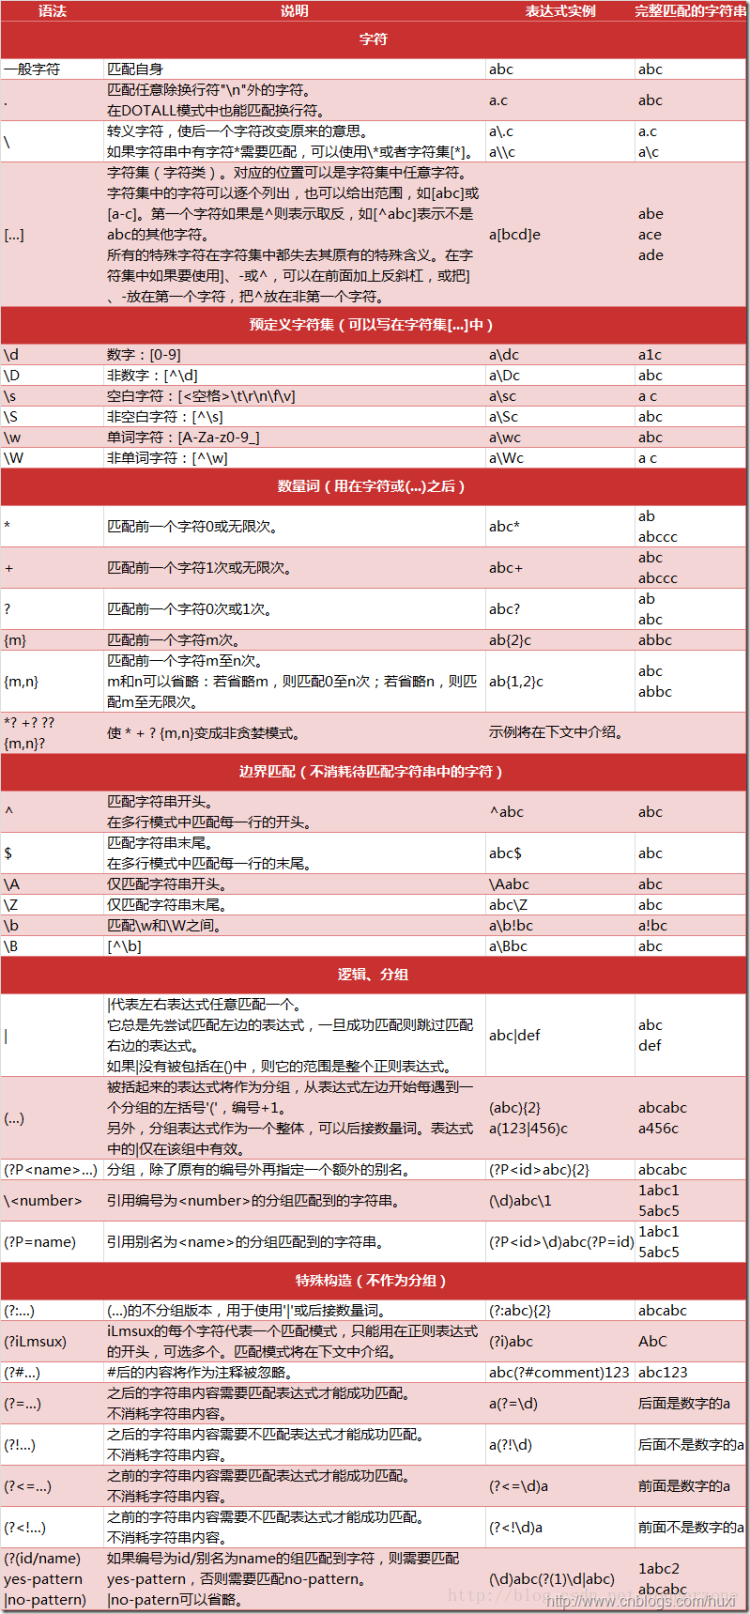

## 判断电话号码

In [2]:
text='425-434-3434'

In [3]:
len(text)

12

In [4]:
def isphonenumber(text):
    if len(text)!=12:
        return False
    for i in range(0,3):
        if not text[i].isdecimal():
            return False
    if text[3]!='-':
        return False
    for i in range(4,7):
        if not text[i].isdecimal():
            return False
    if text[7]!='-':
        return False
    for i in range(8,12):
        if not text[i].isdecimal():
            return False
    return True

In [13]:
isphonenumber('425-434-3434')

True

## 从一串长字符中查找电话号码

In [14]:
message = 'Call me at 415-555-1011 tomorrow. 415-555-9999 is my office.'

- 一般方法

In [18]:
for i in range(len(message)):
    chunk=message[i:i+12]
    if isphonenumber(chunk):
        print('phone number found:'+chunk)
print('done')

phone number found:415-555-1011
phone number found:415-555-9999
done


- 正则表达式匹配

In [29]:
import re
phonenumregex=re.compile('\d\d\d-\d\d\d-\d\d\d\d')#\d 可以理解为数字占位符
mo=phonenumregex.search(message)
mo.group()#通过proup返回匹配结果
#返回的是第一个匹配到的值

'415-555-1011'

In [30]:
import re
phoneNumRegex=re.compile('\d\d\d-\d\d\d-\d\d\d\d')
mo=phonenumregex.search(message)
if mo:
    print(mo.group())

415-555-1011


## 提取字符串

- group:返回一个

In [31]:
import re
heroRegex = re.compile ('Batman|Spiderman')
mo1 = heroRegex.search('Spiderman Batman')
mo1.group()
#返回第一次出现的匹配文本

'Spiderman'

In [33]:
import re
batRegex = re.compile('Bat(man|mobile|copter|bat)')
#可以匹配'Batman'、'Batmobile'、'Batcopter'和'Batbat'中任意一个
mo = batRegex.search('Batmobile lost a wheel')
mo.group()

'Batmobile'

In [37]:
import re
batRegex = re.compile('Bat(wo)?man')#? 可选匹配
mo1 = batRegex.search('The Adventures of Batwoman')
mo1.group()

'Batwoman'

In [38]:
import re
phoneRegex = re.compile('(\d\d\d-)?\d\d\d-\d\d\d\d')#包含或者不包含区号
mo1 = phoneRegex.search('My number is 415-555-4242')
print(mo1.group())
mo2 = phoneRegex.search('My number is 555-4242')
print(mo2.group())

415-555-4242
555-4242


In [39]:
import re
batRegex = re.compile('Bat(wo)*man')# * 零次或多次匹配 
mo1 = batRegex.search('The Adventures of Batwowowowowoman')
mo1.group()

'Batwowowowowoman'

In [43]:
import re
batRegex = re.compile('Bat(wo)+man')# + 至少出现一次
mo1 = batRegex.search('The Adventures of Batwoman')
mo1.group()

'Batwoman'

In [45]:
import re
haRegex = re.compile('(ha){3}')#匹配特定次数
mo1 = haRegex.search('hahahaha')
mo1.group()

'hahaha'

In [46]:
import re 
haRegex = re.compile('(ha){2,4}')#贪婪匹配#匹配特定次数
mo1 = haRegex.search('hahahahha')
mo1.group()

'hahaha'

In [48]:
import re
haRegex = re.compile('<.*>')#匹配任意字符#贪婪匹配
mo2 = haRegex.search('fdf<hahahfdfdfdf>df13434ahaha>kkkfk')
mo2.group()

'<hahahfdfdfdf>df13434ahaha>'

In [49]:
import re 
haRegex = re.compile('<.*?>')#匹配任意字符#非贪婪匹配
mo2 = haRegex.search('fdf<hahaha>haha>kkkfk')
mo2.group()

'<hahaha>'

In [50]:
import re 
haRegex = re.compile('<.*>',re.DOTALL)#re.DOTALL 匹配换行
text='''weret<ttt
fdfd>fdf'''
mo2 = haRegex.search(text)
mo2.group()

'<ttt\nfdfd>'

- findall:返回所有

In [52]:
import re
kk = re.compile('\d+')
kk.findall('one1two2three34four4444')#匹配所有的数字

['1', '2', '34', '4444']

In [53]:
import re
patt='[1-5][0-9]'
lis=[10,20,30,40,2,3,59,60,'aa','3aaa']
match=re.findall(patt,str(lis))
if match:
  print(match)#把10-59取出来

['10', '20', '30', '40', '59']


## 提取网页中的电话号码和邮箱

电话号码邮箱地址 http://www.bubuko.com/infodetail-1635265.html

In [55]:
#匹配电话号码和邮箱
import re
import pyperclip
#为电话创建一个正则表达式
phoneRegex = re.compile('\d{8,11}')#8位
#为E-mail 地址创建一个正则表达式
emailRegex = re.compile('''(
[a-zA-Z0-9_%+-]+ # username
@ # @ symbol
[a-zA-Z0-9-]+ # domain name
\.
[a-zA-Z]{2,4}# dot-something
)''', re.VERBOSE) 				#管理复杂文本模式，忽略空白符和注释

# Find matches in clipboard text.
text = str(pyperclip.paste())		#从粘贴板过来的字符串
matches = []
for groups in phoneRegex.findall(text):
    matches.append(groups)   
for groups in emailRegex.findall(text):
    matches.append(groups)
# Copy results to the clipboard.
if len(matches) > 0:
    print('Copied to clipboard:')
    print('\n'.join(matches))
else:
    print('No phone numbers or email addresses found.')

Copied to clipboard:
13717793170
65515511
4008000088
1436507725
3053426405
15699788000
28586189
13608510837
13595177075
13901195701
68579889
87388888
13580300297
02087377340
13825074671
02087373998
65102158
65102160
13910201685
67181551
13910201685
13838068667
13837166366
513460486
838854395
13021995899
63035987
63036661
65251520
64014567
65124966
65209114
63036424
65290114
66022362
lawtoday@cctv.com
ab30@cctv.com
shjl@cctv.com
greatfire@greatfire.org
ah12331@126.com
mod@mod.gov
ccdi@mos.gov
djzb@mail.cin
cin@mail.cin
mhwz@mail.mlr
gwycss@163.com
gwycss@163.com
gwycss@163.com
wzbj@chinasafety.gov
bgt@sport.gov
jcj@sport.gov
wzzb@mohrss.gov
webmaster@cnta.gov
sarft@chinasarft.gov
webmaster@cnsa.gov
webmaster@agri.gov
service@hmo.gov
webmaster@aqsiq.gov
webmaster@mwr.gov
webmaster@mwr.gov
pfmaster@legalinfo.gov
yzxx@court.gov
jcgxy@sina.cn
iaaca2006@yahoo.com
yfw@jcrb.com
webmaster@zytzb.gov
tougao@zytzb.gov
xinxi@idcpc.org
tgwww@ccps.gov
webmaster@cctv.com
kf@people.cn
rmzx@peopledaily.